# HOMEWORK 1: Valutazione
Si è usato trec_eval di Terrier per effettuare la valutazione, si sono quindi ottenuti i valori di:
* MAP: dal campo map all
* Precision@10: dal campo P_10 all
* Rprec: da Rprec all

Mentre risulta necessario calcolare ANOVA-oneway

# Identificazione delle run:
Le run sono identificate come segue:
* RUN#0: modello BM25 con indice con PorterStemmer e Stopwords;
* RUN#1: modello TFIDF con indice con PorterStemmer e Stopwords;
* RUN#2: modello BM25 con indice con PorterStemmer;
* RUN#3: modello TFIDF con indice senza PorterStemmer e Stopwords.

In [1]:
#import pandas as pd
import scipy.stats as stats
#import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
import matplotlib.pyplot as plt
#creo la funzione che mi popolerà gli array
def insertAll(file,array,parameter):
    file=open(file)
    lines = file.readlines()
    #print(array,parameter)
    for index in range(len(lines)):
        line=lines[index]
        line=line.split()
        #print(line[0])
        #print(parameter)
        if (line[0]==parameter) and (line[1]!="all"):
            array.append(line[2])
        elif (line[0]==parameter) and (parameter=="map") and(line[1]=="all"):
            #print(line)
            maps.append(line[2])
        elif (line[0]==parameter) and (parameter=="P_10") and (line[1]=="all"):
            #print(line)
            p10s.append(line[2])
        elif (line[0]==parameter) and (parameter=="Rprec") and (line[1]=="all"):
            #print(line)
            rprecs.append(line[2])
    file.close()
path="C:\\Users\\franc\\Desktop\\Utility\\terrier\\terrier-core-4.4\\var\\valutazioni\\"
#apro tutti i file delle valutazioni
valutazioneBM25_0  = path+"valutazioneBM25_0.txt"
#creo l'array che conterrà i valori che cerco
ap_bm250=[]
p10_bm250=[]
rprec_bm250=[]
maps=[]
p10s=[]
rprecs=[]
#apro tutti i file delle valutazioni
valutazioneTFIDF_1  = path+"valutazioneTFIDF_1.txt"
#creo l'array che conterrà i valori che cerco
ap_tfidf1=[]
p10_tfidf1=[]
rprec_tfidf1=[]
#apro tutti i file delle valutazioni
valutazioneBM25_2  = path+"valutazioneBM25_2.txt" 
#creo l'array che conterrà i valori che cerco
ap_bm252=[]
p10_bm252=[]
rprec_bm252=[]
#apro tutti i file delle valutazioni
valutazioneTFIDF_3  = path+"valutazioneTFIDF_3.txt" 
#creo l'array che conterrà i valori che cerco
ap_tfidf3=[]
p10_tfidf3=[]
rprec_tfidf3=[]
#BM25_0
print("Sto creando i vettori della RUN#0: BM25...")
insertAll(valutazioneBM25_0,ap_bm250,"map")
#print("AP:",ap_bm250)
insertAll(valutazioneBM25_0,p10_bm250,"P_10")
#print("P10:",p10_bm250)
insertAll(valutazioneBM25_0,rprec_bm250,"Rprec")
#print("RPREC:",rprec_bm250)
#TFIDF_1
print("Sto creando i vettori della RUN#1: TFIDF...")
insertAll(valutazioneTFIDF_1,ap_tfidf1,"map")
insertAll(valutazioneTFIDF_1,p10_tfidf1,"P_10")
insertAll(valutazioneTFIDF_1,rprec_tfidf1,"Rprec")
#print("AP:",ap_tfidf1)
#print("P10:",p10_tfidf1)
#print("RPREC:",rprec_tfidf1)
#BM25_2
print("Sto creando i vettori della RUN#2: BM25... ")
insertAll(valutazioneBM25_2,ap_bm252,"map")
#print("AP:",ap_bm252)
insertAll(valutazioneBM25_2,p10_bm252,"P_10")
#print("P10:",p10_bm252)
insertAll(valutazioneBM25_2,rprec_bm252,"Rprec")
#print("RPREC:",rprec_bm252)
#TFIDF_3
print("Sto creando i vettori della RUN#3: TFIDF... ")
insertAll(valutazioneTFIDF_3,ap_tfidf3,"map")
insertAll(valutazioneTFIDF_3,p10_tfidf3,"P_10")
insertAll(valutazioneTFIDF_3,rprec_tfidf3,"Rprec")
#print("AP:",ap_tfidf3)
#print("P10:",p10_tfidf3)
#print("RPREC:",rprec_tfidf3)
print("Vettori creati!")
Fvalue, pvalue = stats.f_oneway(ap_bm250, ap_tfidf1, ap_bm252, ap_tfidf3)
Fvaluep10, pvaluep10 = stats.f_oneway(p10_bm250, p10_tfidf1, p10_bm252, p10_tfidf3)
Fvaluerp, pvaluerp = stats.f_oneway(rprec_bm250, rprec_tfidf1, rprec_bm252, rprec_tfidf3)
print("ANOVA one-way per AP:\n","F-value:",Fvalue,"P-value:",pvalue)
print("ANOVA one-way per Precision@10:\n","F-value:",Fvaluep10,"P-value:",pvaluep10)
print("ANOVA one-way per Rprec:\n","F-value:",Fvaluerp,"P-value:",pvaluerp)

Sto creando i vettori della RUN#0: BM25...
Sto creando i vettori della RUN#1: TFIDF...
Sto creando i vettori della RUN#2: BM25... 
Sto creando i vettori della RUN#3: TFIDF... 
Vettori creati!
ANOVA one-way per AP:
 F-value: 0.269822428311433 P-value: 0.8471081879709074
ANOVA one-way per Precision@10:
 F-value: 0.35778395335621926 P-value: 0.7835600894153874
ANOVA one-way per Rprec:
 F-value: 0.35084941805375086 P-value: 0.7885747493027742


In [2]:
#controllo la validità dell'ipotesi, confronto alpha con pvalue e eventualmente lo sostituisco
alpha=0.05
if pvalue<alpha:
    print("Rifiuto la null-hypothesis")
    alpha=pvalue
else:
    print("Accetto la null-hypothesis")


Accetto la null-hypothesis


In [3]:
#Funzione ANOVA e Tukey
from statsmodels.stats.multicomp import MultiComparison
def Tukey(vector0,vector1,vector2,vector3,runID,alpha,xlabel):
    vectorAll=np.concatenate([vector0, vector1, vector2, vector3])
    mc = MultiComparison(vectorAll.astype('float'), runID)
    result = mc.tukeyhsd(alpha)
    print(xlabel)
    print(result)
    result.plot_simultaneous(comparison_name="RUN#0",xlabel=xlabel,ylabel="RUN")

AP
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
RUN#0  RUN#1  -0.0005  -0.0865 0.0855 False 
RUN#0  RUN#2  -0.0018  -0.0877 0.0842 False 
RUN#0  RUN#3  -0.0251  -0.1111 0.0609 False 
RUN#1  RUN#2  -0.0012  -0.0872 0.0848 False 
RUN#1  RUN#3  -0.0246  -0.1106 0.0614 False 
RUN#2  RUN#3  -0.0233  -0.1093 0.0626 False 
--------------------------------------------
P_10
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
RUN#0  RUN#1   -0.004  -0.1572 0.1492 False 
RUN#0  RUN#2   -0.01   -0.1632 0.1432 False 
RUN#0  RUN#3   -0.054  -0.2072 0.0992 False 
RUN#1  RUN#2   -0.006  -0.1592 0.1472 False 
RUN#1  RUN#3   -0.05   -0.2032 0.1032 False 
RUN#2  RUN#3   -0.044  -0.1972 0.1092 False 
--------------------------------------------
RPREC
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff 

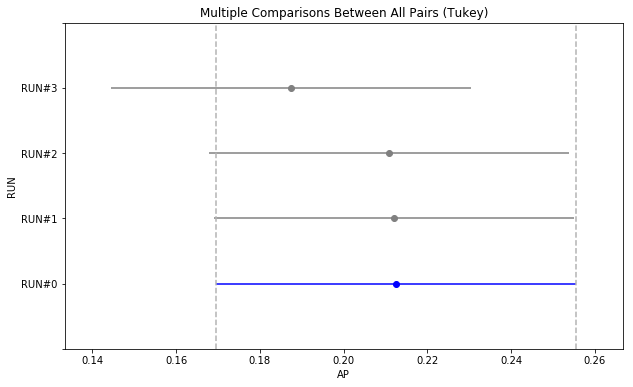

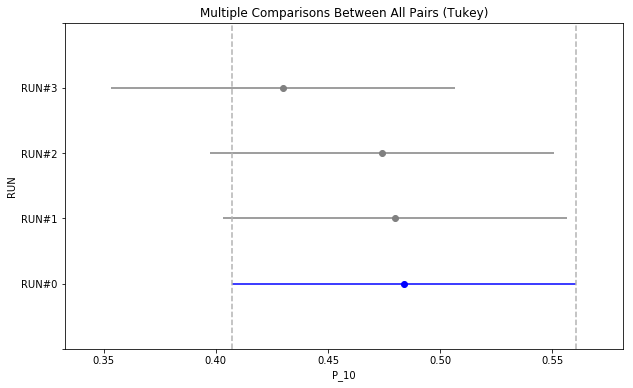

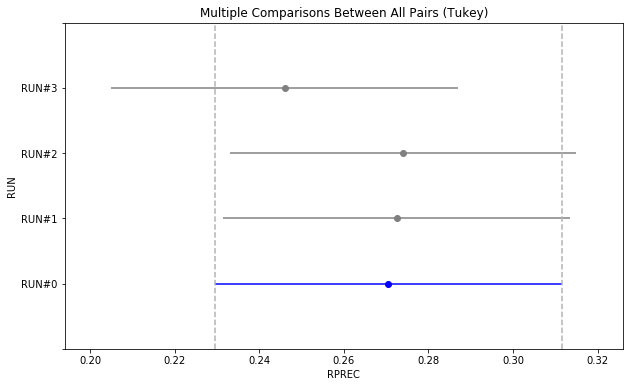

In [4]:
runID=[]
for i in range(4):
#popolo il vettore
    for index in range(50):
        runID.append("RUN#"+str(i))
Tukey(ap_bm250, ap_tfidf1, ap_bm252, ap_tfidf3,runID,alpha,"AP")
Tukey(p10_bm250, p10_tfidf1, p10_bm252, p10_tfidf3,runID,alpha,"P_10")
Tukey(rprec_bm250, rprec_tfidf1, rprec_bm252, rprec_tfidf3,runID,alpha,"RPREC")

# Risultati
Ora inserisco le tabelle e i grafici con i risultati di MAP,AP per i vari topic e per le varie RUN

╒══════════╤════════╤════════════════╤═════════╕
│ RUN ID   │    MAP │   Precision@10 │   Rprec │
╞══════════╪════════╪════════════════╪═════════╡
│ RUN#0    │ 0.2126 │          0.484 │  0.2705 │
├──────────┼────────┼────────────────┼─────────┤
│ RUN#1    │ 0.212  │          0.48  │  0.2725 │
├──────────┼────────┼────────────────┼─────────┤
│ RUN#2    │ 0.2108 │          0.474 │  0.274  │
├──────────┼────────┼────────────────┼─────────┤
│ RUN#3    │ 0.1875 │          0.43  │  0.246  │
╘══════════╧════════╧════════════════╧═════════╛


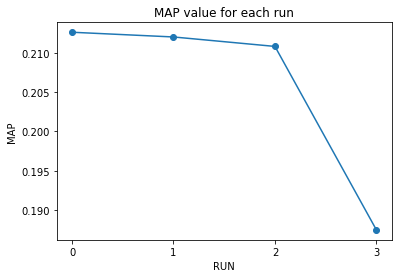

<Figure size 2160x1080 with 0 Axes>

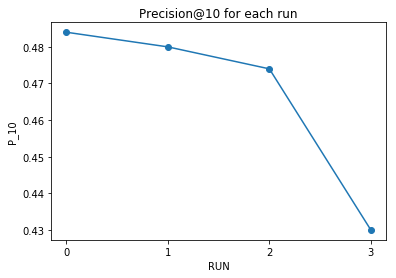

<Figure size 2160x1080 with 0 Axes>

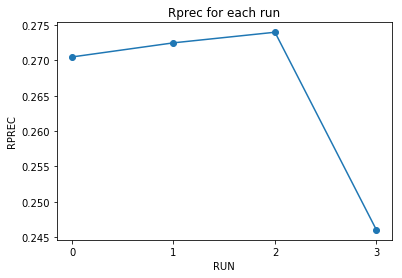

<Figure size 2160x1080 with 0 Axes>

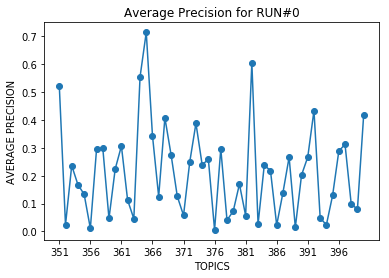

<Figure size 2160x1080 with 0 Axes>

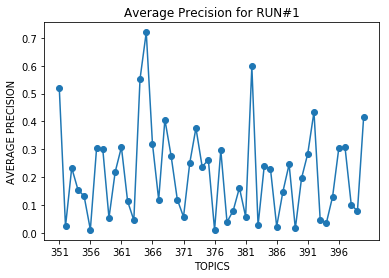

<Figure size 2160x1080 with 0 Axes>

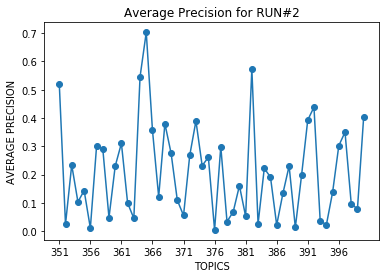

<Figure size 2160x1080 with 0 Axes>

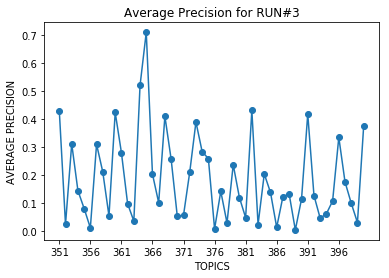

<Figure size 2160x1080 with 0 Axes>

In [5]:
def plot(array,ylabel,xlabel,title,yvalues,x):
    measures=list(map(float,array))
    plt.plot(x,measures,marker="o")
    plt.title(title)
    plt.xlabel(xlabel,fontsize=10)
    plt.xticks(yvalues)
    plt.rc('xtick', labelsize=10) 
    plt.rc('ytick', labelsize=10) 
    plt.ylabel(ylabel,fontsize=10)
#plt.plot(radius, square, marker='o', linestyle='--', color='r', label='Square')
# Prints: [6.0, 4.0]
#plt.rcParams["figure.figsize"] = [8.0,4.0]
    plt.figure(figsize=(30,15))
    plt.show()

from tabulate import tabulate
#Che misure ha senso aggiungere? P_10 e Rprec??
table = [["RUN#0",maps[0],p10s[0],rprecs[0]],["RUN#1",maps[1],p10s[1],rprecs[1]],["RUN#2",maps[2],p10s[2],rprecs[2]],["RUN#3",maps[3],p10s[3],rprecs[3]]]
print(tabulate(table, headers=["RUN ID","MAP","Precision@10","Rprec"],tablefmt="fancy_grid"))


#plotto le MAP delle varie RUN
plot(maps,"MAP","RUN","MAP value for each run",range(4),range(4))
plot(p10s,"P_10","RUN","Precision@10 for each run",range(4),range(4))
plot(rprecs,"RPREC","RUN","Rprec for each run",range(4),range(4))
    
    
plot(ap_bm250,"AVERAGE PRECISION","TOPICS","Average Precision for RUN#0",range(351,400,5),range(351,401))
plot(ap_tfidf1,"AVERAGE PRECISION","TOPICS","Average Precision for RUN#1",range(351,400,5),range(351,401))
plot(ap_bm252,"AVERAGE PRECISION","TOPICS","Average Precision for RUN#2",range(351,400,5),range(351,401))
plot(ap_tfidf3,"AVERAGE PRECISION","TOPICS","Average Precision for RUN#3",range(351,400,5),range(351,401))

Come si può vedere dalle tabelle e dai grafici sopra riportati i risultati migliori si hanno nella run \#0, ossia quella con il modello BM25 e l'utilizzo del PorterStemmer e della stoplis. Si può inoltre aggiungere che nel caso di utilizzo del modello TF_IDF la valutazione è molto influenzata dalla presenza (o meno) dello stemmer, sempre PorterStemmer nel caso in esame, e della stoplist, tanto che la run \#3 è risultata la peggiore in ogni parametro di confronto con le altre.